In [2]:
from corpora_processing import KeyPhraseExtractor
from typing import List, Union

In [3]:
from utils import ConfigLoader, Corpus, Keyword, KeywordType, Language, KeywordTranslator, CorpusFilter

In [4]:
config = ConfigLoader.get_config()

In [5]:
kwt = KeywordTranslator(cache_file=config["translator"]["cache_file"])

In [6]:
corpora: List[Corpus] = [
    Corpus(source=config["corpora"]["bundestag_corpus"], name="bundestag", language=Language.DE),
    Corpus(source=config["corpora"]["abstract_corpus"], name="abstract", language=Language.EN),
    Corpus(source=config["corpora"]["sustainability_corpus"], name="sustainability", language=Language.EN)
]

In [7]:
from simple_statistics import yearwise_documents
mult_years = []
mult_counts = []
filtered_corpora = []
for corpus in corpora:
    corpus = CorpusFilter.filter(corpus=corpus, text_contains_one_of=["fckw", "cfc"])
    filtered_corpora.append(corpus)
    import time
    print(f"{corpus.name}: {len(corpus.get_documents())} documents ({', '.join([str(y) for y in corpus.get_years()])})")
    time.sleep(1)
    
#     years, counts = yearwise_documents(corpus)
    years, counts = yearwise_documents(corpus.sample(number_documents=100))
    mult_years.append(years)
    mult_counts.append(counts)
#     simple_bar_histogram(years, counts)


Filtering 'bundestag' corpus : 100%|██████████| 877973/877973 [00:40<00:00, 21562.49it/s]


bundestag: 298 documents (1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2002, 2003, 2004, 2008, 2009, 2011, 2012, 2014, 2015, 2016, 2018, 2019)


Filtering 'abstract' corpus : 100%|██████████| 407961/407961 [00:15<00:00, 26172.11it/s]


abstract: 905 documents (1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018)


Filtering 'sustainability' corpus : 100%|██████████| 221037/221037 [00:08<00:00, 24617.37it/s]


sustainability: 96 documents (2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018)


In [8]:
mult_counts = []
mult_years = []
for corpus in filtered_corpora:
#     years, counts = yearwise_documents(corpus)
    years, counts = yearwise_documents(corpus.sample(number_documents=30, seed=42))
    mult_years.append(years)
    mult_counts.append(counts)
#     simple_bar_histogram(years, counts)

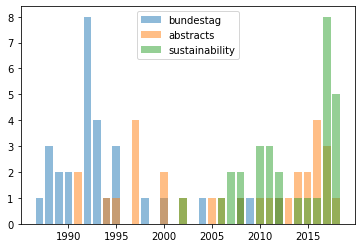

In [9]:
from plot_utils import multi_bar_histogram
multi_bar_histogram(mult_years, mult_counts, labels=["bundestag", "abstracts", "sustainability"], normalize=False, corpus_lengths=[877973, 407961, 221034])

In [10]:
# extract keywords from documents in corpus and assign keywords to documents
sampled_corpora = [corpus.sample(1, seed=42) for corpus in filtered_corpora]

In [11]:
for corpus in sampled_corpora:
    KeyPhraseExtractor.rake(corpus=corpus)

Assign keywords to documents: 100%|██████████| 1/1 [00:00<00:00, 683.45it/s]


In [12]:
import re
def remove_punctuation(corpus: Corpus):
    for d in corpus.get_documents():
        res = re.sub(r'[^a-zA-ZäöüÖÄÜß\-\s\.!\?]', '', d.text)
        res = re.sub(r' +', ' ', res)
        d.text = res
    

remove_punctuation(sampled_corpora[0])

In [13]:
for corpus in sampled_corpora[:]:
    corpus.translate_keywords(kwt, restrict_per_document=10)

# sampled_corpora[2].get_documents()[0].keywords

found keyword 'reinigung elektronisch gerät verwenden' in cache, taking this one
de 	 cleaning electronic gadget use 			 reinigung elektronisch gerät verwenden
found keyword 'folgen dar – schätzung' in cache, taking this one
de 	 follow is - estimate 			 folgen dar – schätzung
found keyword 'bundeswehr eingesetzt fckwhaltigen kältemittel' in cache, taking this one
de 	 Armed Forces used fckwhaltigen refrigerant 			 bundeswehr eingesetzt fckwhaltigen kältemittel
found keyword 'geschlossen system betragen 24' in cache, taking this one
de 	 closed system are 24 			 geschlossen system betragen 24
found keyword 'halon 1 301' in cache, taking this one
de 	 halon 1 301 			 halon 1 301
found keyword 'herr kollege erler' in cache, taking this one
de 	 mr colleague learn 			 herr kollege erler
found keyword '780 t halon' in cache, taking this one
de 	 780 t halon 			 780 t halon
found keyword 'weit fallend tendenz' in cache, taking this one
de 	 far falling trend 			 weit fallend tendenz
found k

In [14]:
for corpus in sampled_corpora[:]:
    print(corpus.translate_keywords(kwt, restrict_per_document=1))

# sampled_corpora[2].get_documents()[0].keywords

found keyword 'reinigung elektronisch gerät verwenden' in cache, taking this one
de 	 cleaning electronic gadget use 			 reinigung elektronisch gerät verwenden
[de(cleaning electronic gadget use | reinigung elektronisch gerät verwenden)]
found keyword 'potent hydrofluorocarbon greenhouse gas' in cache, taking this one
en 	 potent hydrofluorocarbon greenhouse gas 			 potent Fluorkohlenwasserstoff- Treibhausgas
[en(potent hydrofluorocarbon greenhouse gas | potent Fluorkohlenwasserstoff- Treibhausgas)]
found keyword 'therefore require little maintenance' in cache, taking this one
en 	 therefore require little maintenance 			 deshalb benötigen wenig Wartung
[en(therefore require little maintenance | deshalb benötigen wenig Wartung)]


In [15]:
sampled_corpora[0].get_documents()[0].keywords

[de(cleaning electronic gadget use | reinigung elektronisch gerät verwenden),
 de(follow is - estimate | folgen dar – schätzung),
 de(Armed Forces used fckwhaltigen refrigerant | bundeswehr eingesetzt fckwhaltigen kältemittel),
 de(closed system are 24 | geschlossen system betragen 24),
 de(halon 1 301 | halon 1 301),
 de(mr colleague learn | herr kollege erler),
 de(780 t halon | 780 t halon),
 de(far falling trend | weit fallend tendenz),
 de(6 t fckw | 6 t fckw),
 de(closed system | geschlossen system),
 de(- | verbrauch betragen),
 de(- | tonne –),
 de(- | kreislauf verwenden),
 de(- | herr präsident),
 de(- | weit fallen),
 de(- | weit aufschlüsselung),
 de(- | 9 t),
 de(- | 65 t),
 de(- | 253 t),
 de(- | 2 t),
 de(- | haltige reinigungsmittel),
 de(- | gerne nachliefern),
 de(- | feuerlöschmittel bevorratet),
 de(- | darauf aufmerksam),
 de(- | anlagetypen derzeit),
 de(- | menge reduzieren),
 de(- | jahr 1990),
 de(- | bundeswehr),
 de(- | tendenz),
 de(- | fckw),
 de(- | menge)

In [16]:
from utils import KeywordMatcher
KeywordMatcher.match_corpora(sampled_corpora[0], sampled_corpora[1])

({}, {})

In [17]:
kwt = KeywordTranslator()
for corpus in sampled_corpora:
    for d in corpus.get_documents():
        print(d.text[:100], '...\n  keywords:')
        for kw in d.keywords:
            print('    - \"'+str(kw)+'\"')
        print('\n')

Herr Präsident ! Herr Kollege Erler im Bereich der Bundeswehr werden t Halon als Feuerlöschmittel be ...
  keywords:
    - "de(clean electronic gadget use | reinigung elektronisch geraten verwenden)"
    - "de(follow be - estimate | folgen dar – schätzung)"
    - "de(Armed Forces use fckwhaltigen refrigerant | bundeswehr einsetzen fckwhaltigen kältemittel)"
    - "de(closed system be 24 | schließen system betragen 24)"
    - "de(halon 1 301 | halon 1 301)"
    - "de(mr colleague learn | herr kollege erler)"
    - "de(780 t halon | 780 t halon)"
    - "de(far fall trend | weit fallen tendenz)"
    - "de(6 t fckw | 6 t fckw)"
    - "de(closed system | schließen system)"
    - "de(- | verbrauch betragen)"
    - "de(- | tonne –)"
    - "de(- | kreislauf verwenden)"
    - "de(- | herr präsident)"
    - "de(- | weit fallen)"
    - "de(- | weit aufschlüsselung)"
    - "de(- | 9 t)"
    - "de(- | 65 t)"
    - "de(- | 253 t)"
    - "de(- | 2 t)"
    - "de(- | haltige reinigungsmittel)"
    - "d

In [18]:
from typing import Dict, List
from collections import Counter

In [19]:
def key_word_count(keywords: Dict[str, List[str]], top_k=100):
    flattened_keywords = [word for document, document_keywords in keywords.items() for word in document_keywords]
    c = Counter(flattened_keywords)
    if top_k is None:
        return c
    return c.most_common(top_k)

In [20]:
print(key_word_count(rake_keywords))

NameError: name 'rake_keywords' is not defined